In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
item_data = pd.read_csv('item_data.csv', index_col=0)

In [3]:
item_data.shape

(414, 2574)

In [4]:
np.random.seed(101)
x1 = np.random.normal(0, 1, 100)
x2 = x1 + np.random.normal(0, 1, 100)

In [5]:
X = np.stack([x1, x2], axis=1)
print(X.shape)

(100, 2)


In [6]:
print(X[:5])

[[ 2.70684984  4.3136297 ]
 [ 0.62813271 -0.48757726]
 [ 0.90796945 -0.47740911]
 [ 0.50382575 -0.82583431]
 [ 0.65111795  0.69257789]]


In [7]:
#initialise instance of standardscaler
scaler = StandardScaler()

#Fit and transform X
X_scaled = scaler.fit_transform(X)

print(X_scaled[:5])

[[ 2.45737416  2.76968241]
 [ 0.44665735 -0.38363275]
 [ 0.71733989 -0.37695455]
 [ 0.3264168  -0.60579169]
 [ 0.46889068  0.39146426]]


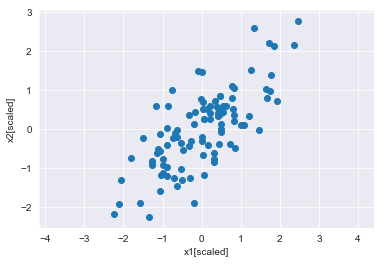

In [8]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1])
plt.axis('equal')
plt.xlabel('x1[scaled]')
plt.ylabel('x2[scaled]')
plt.show()

In [9]:
#initalise instance of PCA transformation
pca = PCA()

#fit the instance
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [10]:
print(pca.components_)

[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


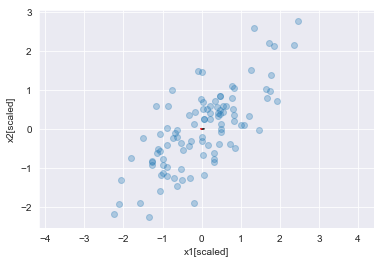

In [37]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], alpha=0.3)
plt.plot([0, 2*pca.components_[0,0]], [0, 2*pca.components_[0, 1]],'k')
plt.plot([0, pca.components_[1,0]], [0, pca.components_[1, 1]], 'r')
plt.axis('equal')
plt.xlabel('x1[scaled]')
plt.ylabel('x2[scaled]')
plt.show()

In [35]:
PC = pca.transform(X_scaled)

ValueError: operands could not be broadcast together with shapes (100,2) (2574,) 

In [33]:
#plot transformed dataset
plt.scatter(PC[:, 0], PC[:, 1], alpha=0.3, color='g')
plt.plot([0,2], [0,0], 'k')
plt.plot([0,0], [0,1], 'r')
plt.axis('equal')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

IndexError: index 1 is out of bounds for axis 1 with size 1

In [13]:
print(pca.explained_variance_ratio_)

[0.86915841 0.13084159]


In [ ]:
# first principal component captured almost 87% of the total variance in the dataset
#second component captured almost 13% of total cariancce

In [14]:
pca = PCA(n_components=1)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [15]:
print(pca.components_)

[[0.70710678 0.70710678]]


In [16]:
PC = pca.transform(X_scaled)
print(PC.shape)

(100, 1)


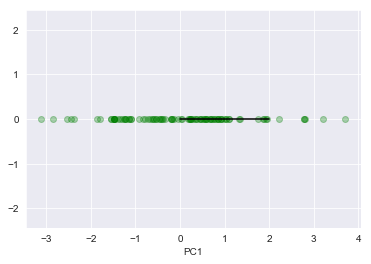

In [38]:
plt.scatter(PC[:,0], len(PC)*[0], alpha=0.3, color='g')
plt.plot([0,2], [0,0], 'k')

plt.axis('equal')
plt.xlabel('PC1')
plt.show()

In [ ]:
p

In [18]:
item_data = pd.read_csv('item_data.csv', index_col=0)

In [19]:
scaler = StandardScaler()
item_data_scaled = scaler.fit_transform(item_data)
print(item_data_scaled[:, 5])

[-0.1253063  -0.1253063  -0.1253063  -0.1253063  -0.1253063  -0.1253063
 -0.1253063  -0.1253063  -0.1253063  -0.1253063  -0.1253063  -0.1253063
 -0.1253063  -0.1253063  -0.1253063  -0.1253063  -0.1253063  -0.1253063
 -0.1253063  -0.1253063  -0.1253063  -0.1253063  -0.1253063  -0.1253063
 -0.1253063  -0.1253063  -0.1253063  -0.1253063  -0.1253063  -0.1253063
 -0.1253063  -0.1253063  -0.1253063  -0.1253063  -0.1253063  -0.1253063
 -0.1253063  -0.1253063  -0.1253063  -0.1253063  -0.1253063  -0.1253063
 -0.1253063  -0.1253063  -0.1253063  -0.1253063  -0.1253063  -0.1253063
 -0.1253063  -0.1253063  -0.1253063  -0.1253063  -0.1253063  -0.1253063
 -0.1253063  -0.1253063  -0.1253063  -0.1253063  -0.1253063  -0.1253063
 -0.1253063  -0.1253063  -0.1253063  -0.1253063  -0.1253063  -0.1253063
 -0.1253063  -0.1253063  -0.1253063  -0.1253063  -0.1253063  -0.1253063
 -0.1253063  -0.1253063   6.35929462 -0.1253063  -0.1253063  -0.1253063
 -0.1253063  -0.1253063  -0.1253063  -0.1253063  -0.1253063  -0.

C:\Users\DELL\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\DELL\Anaconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [20]:
pca = PCA()
pca.fit(item_data_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [21]:
PC_items = pca.transform(item_data_scaled)
print(PC_items[:,5])

[-1.15340917e+01  1.16083403e+00 -3.71539017e+00  6.47834727e-01
 -1.94357940e+00  7.83545047e-01  8.37198157e-01  8.71236675e-01
  1.69930740e+00 -3.17743693e+00  6.30233277e-01 -4.74320133e+01
  2.28900115e+00  8.95234848e-01 -2.56377855e+00 -7.68394243e-02
  5.13216121e+00  1.51120469e+00  1.05333859e+00  1.43610544e+01
  7.34960344e-01  1.53446057e+00  9.74477436e-01  1.04785908e+00
  6.69888526e-01  1.36563525e+00 -3.93588652e-01  1.11902924e+00
  1.40800759e+00 -7.36894030e-01  1.15858756e+00  8.36095389e-02
  9.01456134e-02 -3.55311491e+00  1.36300816e+00  3.36752329e+00
  6.91189235e-01  8.18989268e-01  5.70950655e-01  1.23258055e+00
  4.22344820e-01  4.58103280e-01  1.01622428e+00  6.41447382e-01
  7.59137835e-01  2.04670813e+00 -6.78653721e-01  2.77486997e+00
  2.07730090e-01 -5.24993958e-01 -3.82225048e-01  1.05649001e+00
  7.46060509e-01  1.22893114e+00 -1.35216892e+01  7.35423671e-01
  2.18904943e-02  1.23368126e+00  6.25417688e-01  1.86129136e+00
 -5.72664001e-02 -1.90881

In [22]:
pca.explained_variance_ratio_.sum()

0.9999999999999999

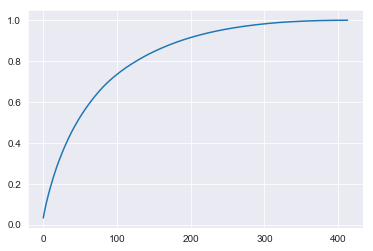

In [23]:
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(len(cumulative_explained_variance)), cumulative_explained_variance)
plt.show()

In [24]:
print(cumulative_explained_variance[124])

0.7955069032205401


In [25]:
pca = PCA(n_components=125)
PC_items = pca.fit_transform(item_data_scaled)
PC_items.shape

(414, 125)

In [26]:
items_pca = pd.DataFrame(PC_items)
items_pca.columns = ['PC()'.format(i+1) for i in range(PC_items.shape[1])]
items_pca.index = item_data.index
items_pca.head()

,PC(),PC(),PC(),PC(),PC(),PC(),PC(),PC(),PC(),PC(),...,PC(),PC(),PC(),PC(),PC(),PC(),PC(),PC(),PC(),PC()
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,5.876141,4.828892,-0.495543,3.093843,-0.633702,-11.534085,2.161913,7.116797,5.336110,4.424089,...,-0.007766,-0.779199,0.613359,-0.330509,-0.004962,-0.045697,0.148163,-0.061750,-0.198612,-0.269058
12348,-4.219839,1.226195,-1.881922,-0.174302,0.817768,1.160852,-0.871961,-0.846827,0.460120,0.854323,...,-1.904435,0.075644,-0.955823,1.409611,0.724342,0.464916,1.907702,-1.416770,1.121250,-2.946993
12349,-1.260838,2.387828,-0.073097,-1.118903,-0.034546,-3.715325,-0.342738,-0.149002,-0.789685,-0.377883,...,4.595645,-4.527504,-2.370799,-3.396166,-3.419379,-1.304617,3.845541,0.807568,-4.652684,2.594639
12350,-4.929319,-0.714874,-1.581119,-0.469789,-0.116164,0.647736,0.112682,-1.336327,1.547287,-1.190830,...,-1.869817,-0.460085,-1.192275,-0.596812,-0.808693,0.373854,-0.282510,-0.819361,-1.010051,0.363232
12352,-2.053129,2.110788,0.184844,0.128379,0.087133,-1.943497,2.383475,0.898283,-0.672848,0.081181,...,1.695937,8.096258,10.325739,-8.947321,-3.582689,-2.078227,3.346192,5.183793,0.928319,-1.933235


In [27]:
items_pca.to_csv('pca_item_data.csv')

In [ ]:
#Eculidian distance between two observations, calculated using the input features